In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [4]:
df = pd.read_csv("913_30_aggregated_median.csv")
e = eval.evaluation(df)
df = e.norm_agg()
name = 'df'
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1280 features were identified


In [5]:
df_pre_r

0.046972396845226215

In [ ]:
e = eval.evaluation(df_path= '913_5_aggregated_median.csv')
con = e.norm_agg()
res_enr_5 = e.eval(con, operation = 'enrichment')
res_enr_5
res_pre_5 = e.eval(con, operation = 'precision_recall')
res_pre_5
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit_5 = pd.DataFrame()
hit_5['bins'] = bins[:-1]
hit_5['h'] = h

res = pd.concat([res_enr_5, res_pre_5, hit_5], ignore_index=False, axis=1)
res.to_csv('913_5_results.csv', index=False)

In [18]:
e = eval.evaluation(df_path= '913_15_aggregated_median.csv')
con = e.norm_agg()
res_enr_15 = e.eval(con, operation = 'enrichment')
res_enr_15
res_pre_15 = e.eval(con, operation = 'precision_recall')
res_pre_15
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit_15 = pd.DataFrame()
hit_15['bins'] = bins[:-1]
hit_15['h'] = h


res = pd.concat([res_enr_15, res_pre_15, hit_15], ignore_index=False, axis=1)
res.to_csv('913_15_results.csv', index=False)

1280 features were identified
running hit@k


In [19]:
e = eval.evaluation(df_path= '913_30_aggregated_median.csv')
con = e.norm_agg()
res_enr_30 = e.eval(con, operation = 'enrichment')
res_enr_30
res_pre_30 = e.eval(con, operation = 'precision_recall')
res_pre_30
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit_30 = pd.DataFrame()
hit_30['bins'] = bins[:-1]
hit_30['h'] = h


res = pd.concat([res_enr_30, res_pre_30, hit_30], ignore_index=False, axis=1)
res.to_csv('913_30_results.csv', index=False)


1280 features were identified
running hit@k


In [23]:
res_enr_30

,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.465767,8.688062,4.956469e-215
1,0.990,0.363574,7.530609,0.000000e+00
2,0.985,0.299007,6.635819,0.000000e+00
3,0.980,0.251783,5.568921,0.000000e+00
4,0.975,0.218041,4.974922,0.000000e+00
5,0.970,0.192604,4.482952,0.000000e+00
6,0.965,0.172219,4.060819,0.000000e+00
7,0.960,0.155718,3.753665,2.299665e-316


running hit@k


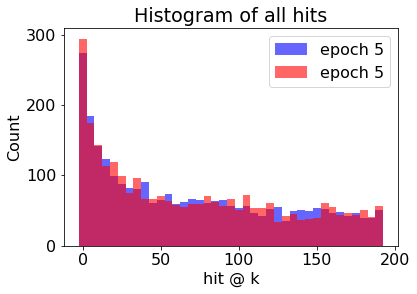

In [12]:
# %matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.bar(hit_5['bins'], hit_5['h'], width=5, alpha=0.6, color='blue', label='epoch 5')
plt.bar(hit_15['bins'], hit_15['h'], width=5, alpha=0.6, color='red', label='epoch 5')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()


In [8]:
# # compare to others
# e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
# con = e.norm_agg()
# comp_enr = e.eval(con, operation = 'enrichment')
# res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

In [6]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

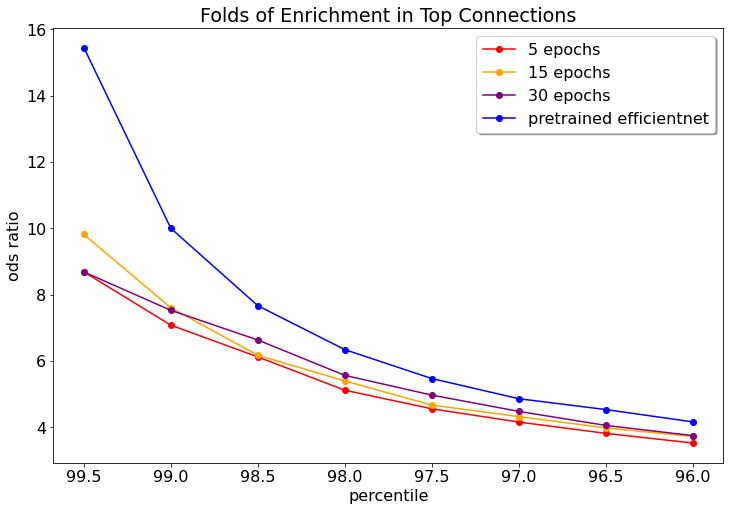

In [21]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr_5["enrichment_percentile"], res_enr_5["ods_ratio"], marker="o", color="red", label = '5 epochs')
plt.plot(100*res_enr_15["enrichment_percentile"], res_enr_15["ods_ratio"], marker="o", color="orange", label = '15 epochs')
plt.plot(100*res_enr_30["enrichment_percentile"], res_enr_30["ods_ratio"], marker="o", color="purple", label = '30 epochs')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

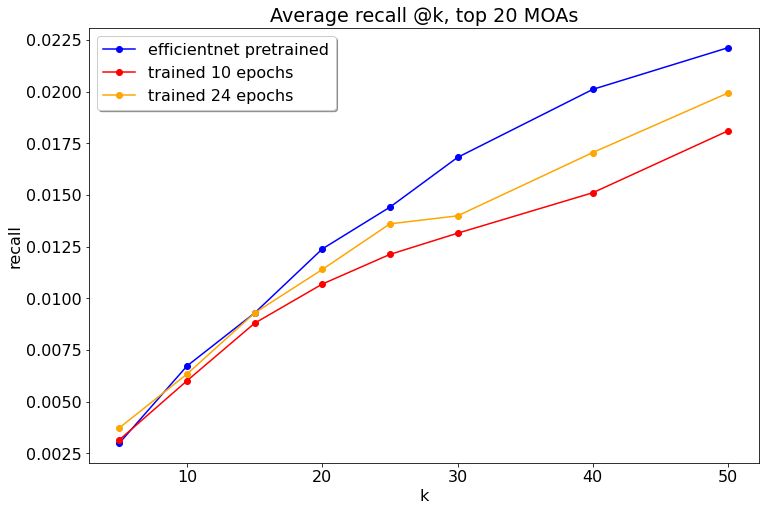

In [14]:
efficientnet = pd.read_csv(pre +'res_prec_spherized.csv')

plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(efficientnet["k"], efficientnet["recall"], marker="o", color="blue", label = 'efficientnet pretrained')
plt.plot(res_pre_5["k"], res_pre_5["recall"], marker="o", color="red", label = '5 epochs')
plt.plot(res_pre_15["k"], res_pre_15["recall"], marker="o", color="orange", label = '15 epochs')
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

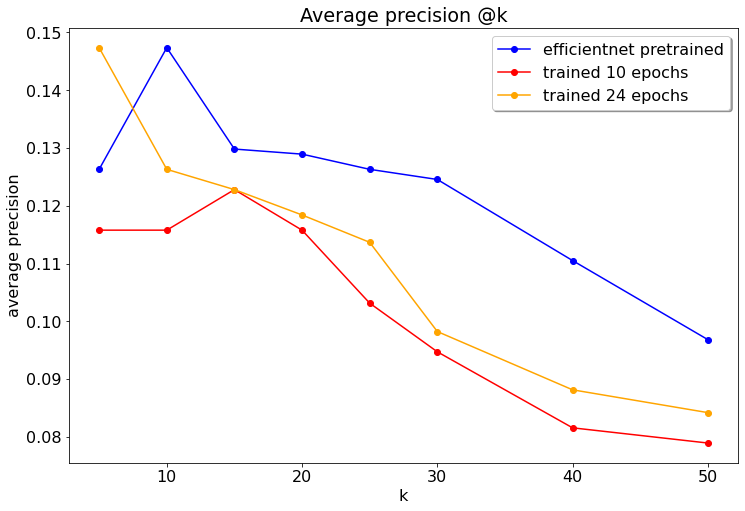

In [15]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(efficientnet["k"], efficientnet["precision"], marker="o", color="blue", label = 'efficientnet pretrained')
plt.plot(res_pre_5["k"], res_pre_5["precision"], marker="o", color="red", label = 'trained 10 epochs')
plt.plot(res_pre_15["k"], res_pre_15["precision"], marker="o", color="orange", label = 'trained 24 epochs')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()